In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import metal_evolution

In [143]:
# reload module if already loaded
import importlib
importlib.reload(metal_evolution)
from metal_evolution import metals, metals_MZR, run_n_times

# Just look at offsets, ignore MZR (for now)

$$\frac{d(\Delta Z_*)}{dt} = \frac{1}{M_*}\frac{dM_*}{dt}\left(\Delta Z_{\rm gas} - \Delta Z_*\right)$$

In [59]:
dt = 1e5
HubbleTimez2 = 3.1e9 # z=2
sSFR = 1/HubbleTimez2

In [111]:
num_Zgas_jumps = 1000
Zpertb = 0.12 * np.random.randn( num_Zgas_jumps ) 

coherenceTimes = np.random.exponential( scale=0.1*HubbleTimez2, size=num_Zgas_jumps )

In [112]:
np.sum(coherenceTimes) / 1e9 # Total sim time in Gyr

326.00910489203034

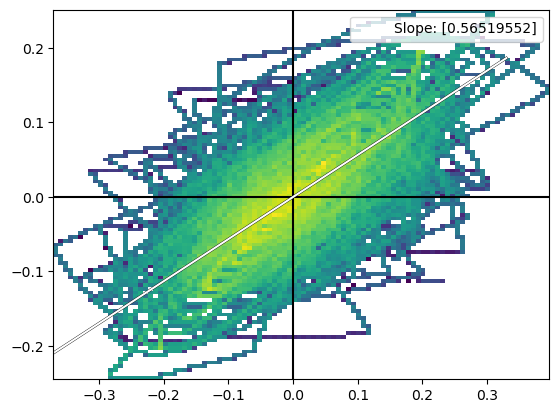

In [113]:
noMZR = metals(0, 0, sSFR*10, dt)
noMZR.run( Zpertb, coherenceTimes )
noMZR.plot()

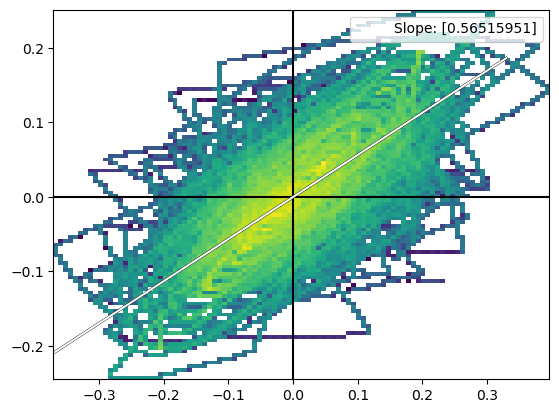

In [114]:
noMZR = metals(0.12*np.random.randn(), 0.12*np.random.randn(), sSFR*10, dt)
noMZR.run( Zpertb, coherenceTimes )
noMZR.plot()

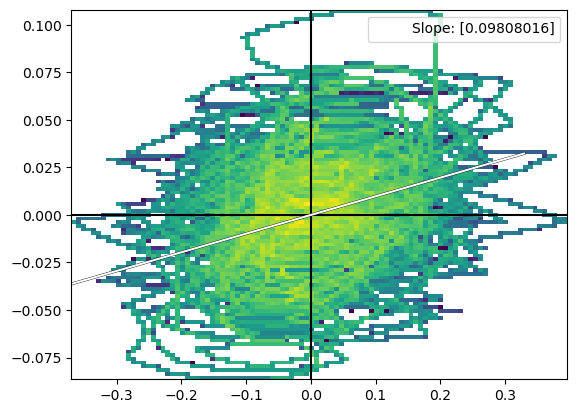

In [115]:
noMZR = metals(0,0, sSFR*1, dt)
noMZR.run( Zpertb, coherenceTimes )
noMZR.plot()

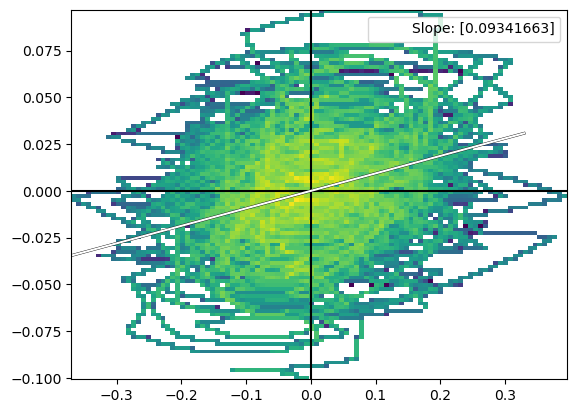

In [116]:
noMZR = metals(0.12*np.random.randn(), 0.12*np.random.randn(), sSFR*1, dt)
noMZR.run( Zpertb, coherenceTimes )
noMZR.plot()

## See the discussion section in this paper for a more detailed understanding. The below is very poorly conditioned and has limited testing. As such, there may be bugs. Proceed with caution in your interpretation of these plots!!!!

# No longer ignoring MZRs

$$\frac{d(\Delta Z_*)}{dt} = \frac{1}{M_*}\frac{dM_*}{dt}\left[\langle Z_*\rangle - \langle Z_{\rm gas}\rangle\right] + \frac{1}{M_*}\frac{dM_*}{dt}\left[\Delta Z_{\rm gas} - \Delta Z_*\right] + \frac{d\langle Z_*\rangle}{dt}$$

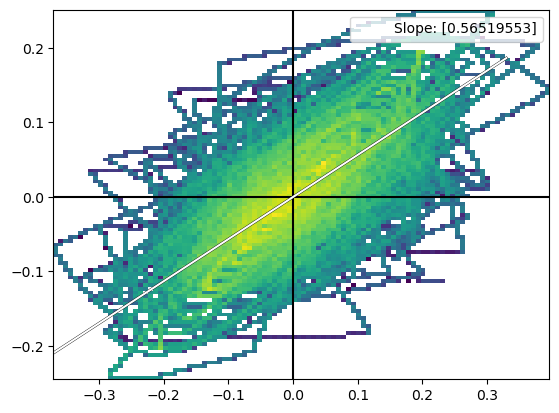

In [119]:
# Test that this reproduces the above in the limit where only 2nd term matters
MZR = metals_MZR(0, 0, sSFR*10, dt, 0, 0, 0, 0)
MZR.run( Zpertb, coherenceTimes )
MZR.plot()

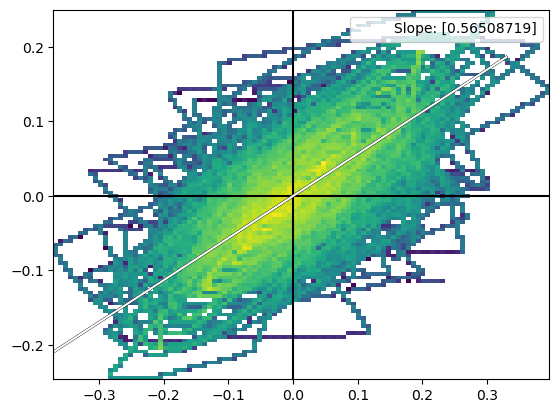

In [126]:
# Small (compared to scatter) differences in the <Z_*> and <Z_gas>
MZR = metals_MZR(0, 0, sSFR*10, dt, 0.12*np.random.randn()/10, 0,
                 0, 0)
MZR.run(Zpertb, coherenceTimes)
MZR.plot()

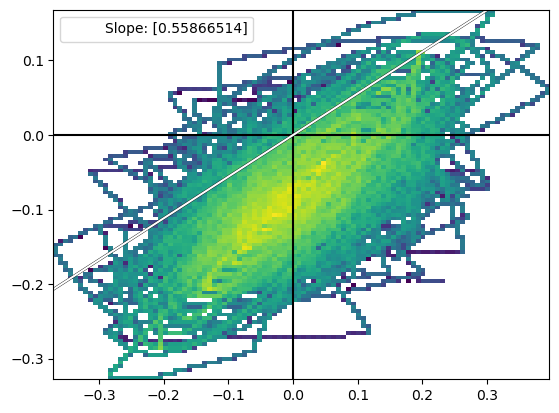

In [127]:
# Similar (compared to scatter) differences in the <Z_*> and <Z_gas>
MZR = metals_MZR(0, 0, sSFR*10, dt, 0.12*np.random.randn(), 0,
                 0, 0)
MZR.run(Zpertb, coherenceTimes)
MZR.plot()

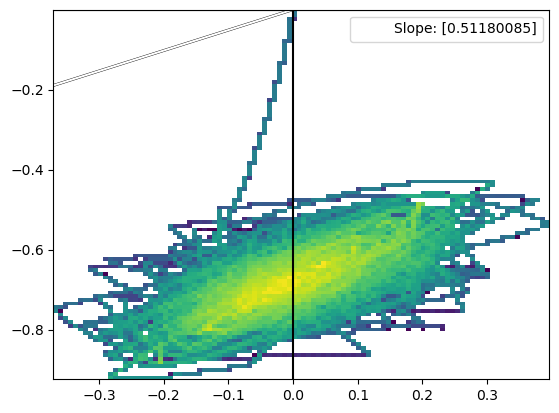

In [128]:
# Large (compared to scatter) differences in the <Z_*> and <Z_gas>
MZR = metals_MZR(0, 0, sSFR*10, dt, 0.12*np.random.randn()*10, 0,
                 0, 0)
MZR.run(Zpertb, coherenceTimes)
MZR.plot()

In [145]:
### MZsR evolutionary rates ###
# Ill -> 0.00 dex/Gyr
# TNG -> 0.02 dex/Gyr
# EAG -> 0.08 dex/Gyr
### MZgR evolutionary rates ###
# Ill -> 0.05 dex/Gyr
# TNG -> 0.08 dex/Gyr
# EAG -> 0.09 dex/Gyr

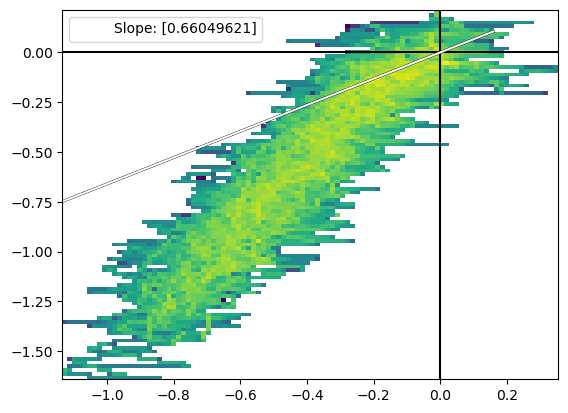

In [144]:
# MZR Evolution Illustris
MZR = run_n_times(sSFR, dt, 0.0, 0.0, 0.00/1e9, 0.05/1e9, n=40)

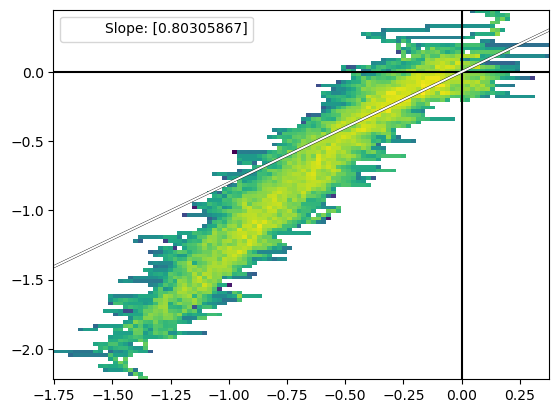

In [146]:
# MZR Evolution TNG
MZR = run_n_times(sSFR, dt, 0.0, 0.0, 0.02/1e9, 0.08/1e9, n=40)

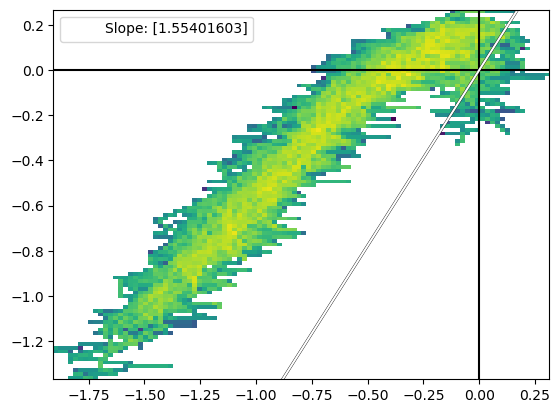

In [147]:
# MZR Evolution EAGLE
MZR = run_n_times(sSFR, dt, 0.0, 0.0, 0.08/1e9, 0.09/1e9, n=40)

## More complex inter-terms

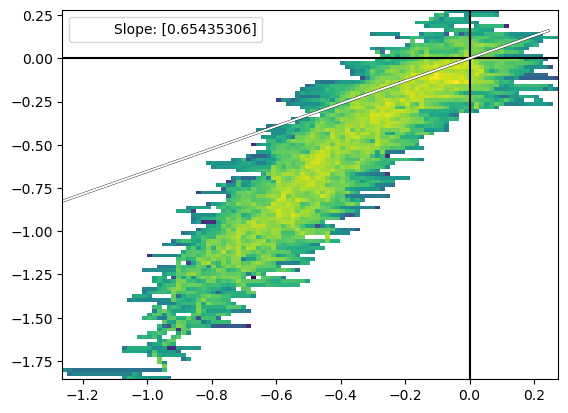

In [153]:
# Small (compared to scatter) differences in the <Z_*> and <Z_gas>
run_n_times(sSFR, dt, 0.12*np.random.randn()/10, 0, 0.00/1e9, 0.05/1e9,n=40)

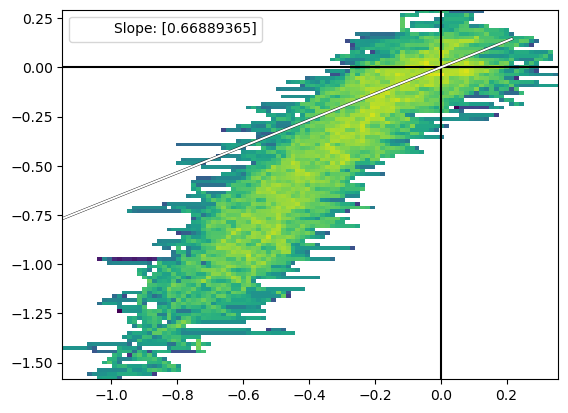

In [154]:
# Similar (compared to scatter) differences in the <Z_*> and <Z_gas>
run_n_times(sSFR, dt, 0.12*np.random.randn(), 0, 0.00/1e9, 0.05/1e9,n=40)

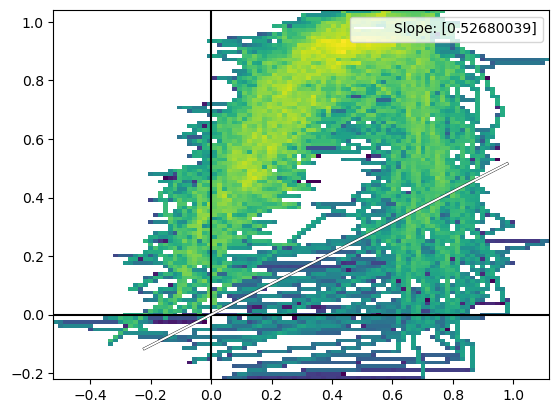

In [155]:
# Large (compared to scatter) differences in the <Z_*> and <Z_gas>
run_n_times(sSFR, dt, 0.12*np.random.randn()*10, 0, 0.00/1e9, 0.05/1e9,n=40)